In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! unzip /content/spam_ham_dataset.csv.zip

Archive:  /content/spam_ham_dataset.csv.zip
  inflating: spam_ham_dataset.csv    


In [ ]:
df=pd.read_csv('/content/spam_ham_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


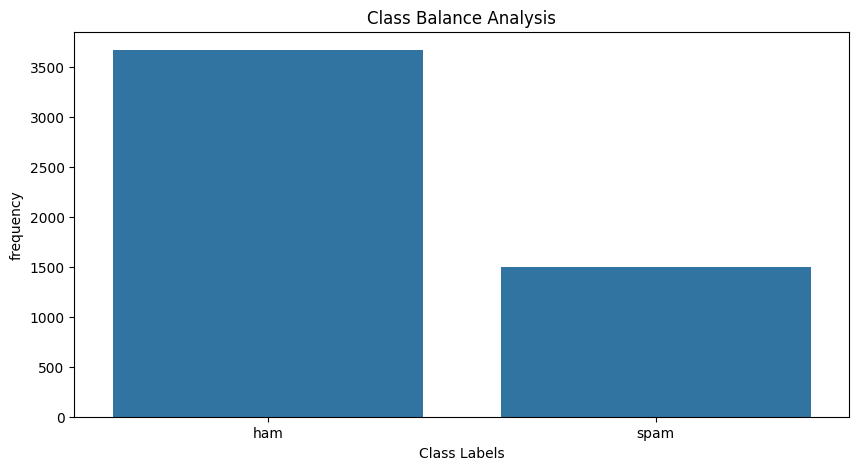

In [ ]:
## Class Balance Analysis
class_count=df['label'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=class_count.index,y=class_count.values)
plt.title('Class Balance Analysis')
plt.ylabel('frequency')
plt.xlabel('Class Labels')
plt.show()

In [ ]:
from collections import Counter

In [ ]:
def get_most_common_words(class_label,num_words,column_name,dataset):
    text=' '.join(message for message in dataset[dataset['label']==class_label][column_name])
    words=text.lower().split()
    return Counter(words).most_common(num_words)

In [ ]:
get_most_common_words('spam',10,'text',df)

[('.', 19489),
 (',', 11227),
 ('-', 7941),
 ('the', 7254),
 ('/', 5707),
 ('to', 5160),
 ('and', 4903),
 (':', 4612),
 ('of', 4490),
 ('a', 3787)]

In [ ]:
ham_words=get_most_common_words('ham',10,'text',df)
spam_words=get_most_common_words('spam',10,'text',df)

In [ ]:
print(ham_words)
print(spam_words)

[('-', 77782), ('/', 37141), ('.', 35192), (',', 29413), (':', 20492), ('the', 18359), ('to', 15172), ('ect', 13897), ('@', 12168), ('for', 7982)]
[('.', 19489), (',', 11227), ('-', 7941), ('the', 7254), ('/', 5707), ('to', 5160), ('and', 4903), (':', 4612), ('of', 4490), ('a', 3787)]


In [ ]:
df['text_length']=df['text'].apply(len)

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num,text_length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [ ]:
df.groupby('label')['text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,3672.0,977.008170,1382.827493,18.0,231.75,530.0,1227.25,32258.0
spam,1499.0,1223.256171,1825.986210,11.0,283.00,576.0,1253.50,22073.0


In [ ]:
## Cleaning punctuation and most common words
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [ ]:
def preprocess_text(text):
    text=text.lower()
    text=text.translate(str.maketrans("", "",string.punctuation))
    words=text.split()
    words=[word for word in words if word not in ENGLISH_STOP_WORDS]
    text=' '.join(words)
    return text

In [ ]:
df['text']

,text
0,Subject: enron methanol ; meter # : 988291\r\n...
1,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,"Subject: photoshop , windows , office . cheap ..."
4,Subject: re : indian springs\r\nthis deal is t...
...,...
5166,Subject: put the 10 on the ft\r\nthe transport...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,Subject: calpine daily gas nomination\r\n>\r\n...
5169,Subject: industrial worksheets for august 2000...


In [ ]:
df.head()

,Unnamed: 0,label,text,label_num,text_length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [ ]:
df['text'].values[0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [ ]:
preprocess_text(df['text'].values[0])

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminary flow data provided daren override pop s daily volume presently zero reflect daily activity obtain gas control change needed asap economics purposes'

In [ ]:
df['cleaned_text']=df['text'].apply(preprocess_text)

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num,text_length,cleaned_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,subject enron methanol meter 988291 follow not...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,subject hpl nom january 9 2001 attached file h...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,subject neon retreat ho ho ho wonderful time y...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,subject photoshop windows office cheap main tr...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,subject indian springs deal book teco pvr reve...


In [ ]:
ham_words=get_most_common_words('ham',20,'cleaned_text',df)
spam_words=get_most_common_words('spam',20,'cleaned_text',df)

In [ ]:
print(ham_words)
print(spam_words)

[('ect', 13897), ('hou', 7281), ('enron', 6555), ('subject', 6403), ('2000', 4308), ('gas', 2861), ('deal', 2789), ('com', 2717), ('meter', 2459), ('cc', 2359), ('pm', 2325), ('hpl', 2318), ('s', 2111), ('2001', 2024), ('1', 2023), ('daren', 1901), ('000', 1880), ('00', 1819), ('10', 1815), ('thanks', 1813)]
[('subject', 1657), ('s', 1316), ('3', 1239), ('com', 992), ('http', 983), ('2', 858), ('company', 728), ('1', 720), ('0', 698), ('e', 631), ('www', 587), ('00', 585), ('information', 520), ('font', 515), ('5', 510), ('td', 504), ('t', 502), ('4', 494), ('statements', 476), ('email', 474)]


In [ ]:
df['cleaned_text_length']=df['cleaned_text'].apply(len)

In [ ]:
df.groupby('label')['cleaned_text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,3672.0,606.051743,872.828956,15.0,149.0,318.5,744.25,20926.0
spam,1499.0,867.532355,1390.066752,7.0,185.5,382.0,850.00,21258.0


In [ ]:
df.head()

,Unnamed: 0,label,text,label_num,text_length,cleaned_text,cleaned_text_length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,subject enron methanol meter 988291 follow not...,226
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,subject hpl nom january 9 2001 attached file h...,72
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,subject neon retreat ho ho ho wonderful time y...,1261
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,subject photoshop windows office cheap main tr...,394
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,subject indian springs deal book teco pvr reve...,195


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer=CountVectorizer()

In [ ]:
x=vectorizer.fit_transform(df['cleaned_text'])

In [ ]:
y=df['label_num']

,label_num
0,0
1,0
2,0
3,1
4,0
...,...
5166,0
5167,0
5168,0
5169,0


In [ ]:
##Training and testing the system
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(4136, 50179)

In [ ]:
X_test.shape

(1035, 50179)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
preds=knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
accuracy=knn.score(X_test,y_test)
accuracy

0.8328502415458937